# Airbnb New User Booking Prediction


Airbnb was born in 2007 when two Hosts welcomed three guests to their San Francisco home. It now has 4 million hosts providing unique places and staying experiences for users. Airbnb travelers can sleep in a cozy treehouse in the rainforest, or have a brunch in a British Castle for a Downton Abbey-style getaway.

According to the official site, users on Airbnb can book a place to stay in 100,000+ cities across 220+ countries. I use the Kaggle New User Booking Dataset to solve the following problems:  
1. What's the trend of new Airbnb users?
2. What are the Airbnb users' feature distribution ?  
3. Which country will a new user make as the first booking?  



### File Description

##### Target variable: Country destination


There are 12 possible outcomes of the destination country: 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no destination found), and 'other'. 'NDF' is different from 'other' because 'other' means there was a booking, but is to a country not included in the list, while 'NDF' means there wasn't a booking.  


##### Features Description

The training and test sets are split by dates. In the test set,I will predict all the new users with first activities after 7/1/2014. 
 
File descriptions  
train_users.csv - the training set of users  
test_users.csv - the test set of users  
id: user id  
date_account_created: the date of account creation  
timestamp_first_active: timestamp of the first activity, note that it can be earlier than date_account_created or   date_first_booking because a user can search before signing up  
date_first_booking: date of first booking  
gender  
age  
signup_method  
signup_flow: the page a user came to signup up from  
language: international language preference  
affiliate_channel: what kind of paid marketing  
affiliate_provider: where the marketing is e.g. google, craigslist, other  
first_affiliate_tracked: whats the first marketing the user interacted with before the signing up  
signup_app  
first_device_type  
first_browser  
country_destination: this is the target variable you are to predict  

sessions.csv - web sessions log for users  
user_id: to be joined with the column 'id' in users table  
action  
action_type  
action_detail  
device_type  
secs_elapsed   


## Outline

1. Data Exploration and Prepocessing
2. Data Visualization
3. Feature Engineering
4. Modeling and Evaluation


In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline
import datetime
from datetime import date
import os
import seaborn as sns
import missingno as msno 
import pickle

from sklearn.preprocessing import *
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer


## Data Exploration and Preprocessing
1. Data types: explore numeric and categorical data
2. Missing data: Percentage of missing data
3. data preprocessing  
   a) drop or impute rows of missing data  
   b) concat train and test dataset for data exploration    
   c) convert data type
   d) fillter data

In [2]:
def read(file):
    df = pd.read_csv(file)
    print(df.shape)
    return df

In [3]:
train= read('../input/airbnb-recruiting-new-user-bookings/train_users_2.csv.zip')
test=read('../input/airbnb-recruiting-new-user-bookings/test_users.csv.zip')



(213451, 16)
(62096, 15)


In [4]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [6]:
test.head(3)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       62096 non-null  object 
 1   date_account_created     62096 non-null  object 
 2   timestamp_first_active   62096 non-null  int64  
 3   date_first_booking       0 non-null      float64
 4   gender                   62096 non-null  object 
 5   age                      33220 non-null  float64
 6   signup_method            62096 non-null  object 
 7   signup_flow              62096 non-null  int64  
 8   language                 62096 non-null  object 
 9   affiliate_channel        62096 non-null  object 
 10  affiliate_provider       62096 non-null  object 
 11  first_affiliate_tracked  62076 non-null  object 
 12  signup_app               62096 non-null  object 
 13  first_device_type        62096 non-null  object 
 14  first_browser         

##### Check if difference between two dataframe's features

In [8]:
train_feature = train.columns
test_feature = test.columns
np.setdiff1d(train_feature,test_feature)

array(['country_destination'], dtype=object)

### Data Preprocessing
#### Check missing values

In [9]:
def miss_data(df):
    '''INPUT
        df: dataframe
        OUTPUT
        miss_counts: list of column that have missing data
        miss_ct: list of rows of missing data in each column
        missing_ratio: list of percentage of missing data in one column
    '''
   
    miss_counts=[cols for cols in df.columns if df[cols].isnull().any()] 
    miss_ct = [df[cols].isnull().sum() for cols in miss_counts]
    
    missing_ratio = ['{:0.1f}%'.format(100 * df[cols].isnull().sum() / df.shape[0])
                                for cols in miss_counts]
    print(miss_counts)
    print(miss_ct)
    print(missing_ratio)
    

In [10]:
miss_data(train)

['date_first_booking', 'age', 'first_affiliate_tracked']
[124543, 87990, 6065]
['58.3%', '41.2%', '2.8%']


In [11]:
miss_data(test)

['date_first_booking', 'age', 'first_affiliate_tracked']
[62096, 28876, 20]
['100.0%', '46.5%', '0.0%']


As the test dataset has no date_first_booking values, I will delete the column. 
first_affiliate_tracked has 2.8% missing value in train data and no missing value in test data, we will fill with NaN for modeling


#### Concatenate training and test dataset 

In [12]:
# The label we need to predict
contry_destination = train.country_destination.values
# the id number is saved for submission
id_test = test.id
train.drop(['country_destination'], axis = 1)
#Concatenating train and test data 
df_all = pd.concat((train, test), axis = 0, ignore_index= True)

In [13]:
# drop the target variable and the column 'date_first_booking'
df_all=df_all.drop(['country_destination','date_first_booking'], axis = 1)

In [14]:
df_all.head(5)

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,gxn3p5htnn,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,87mebub9p4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


In [15]:
miss_data(df_all)

['age', 'first_affiliate_tracked']
[116866, 6085]
['42.4%', '2.2%']


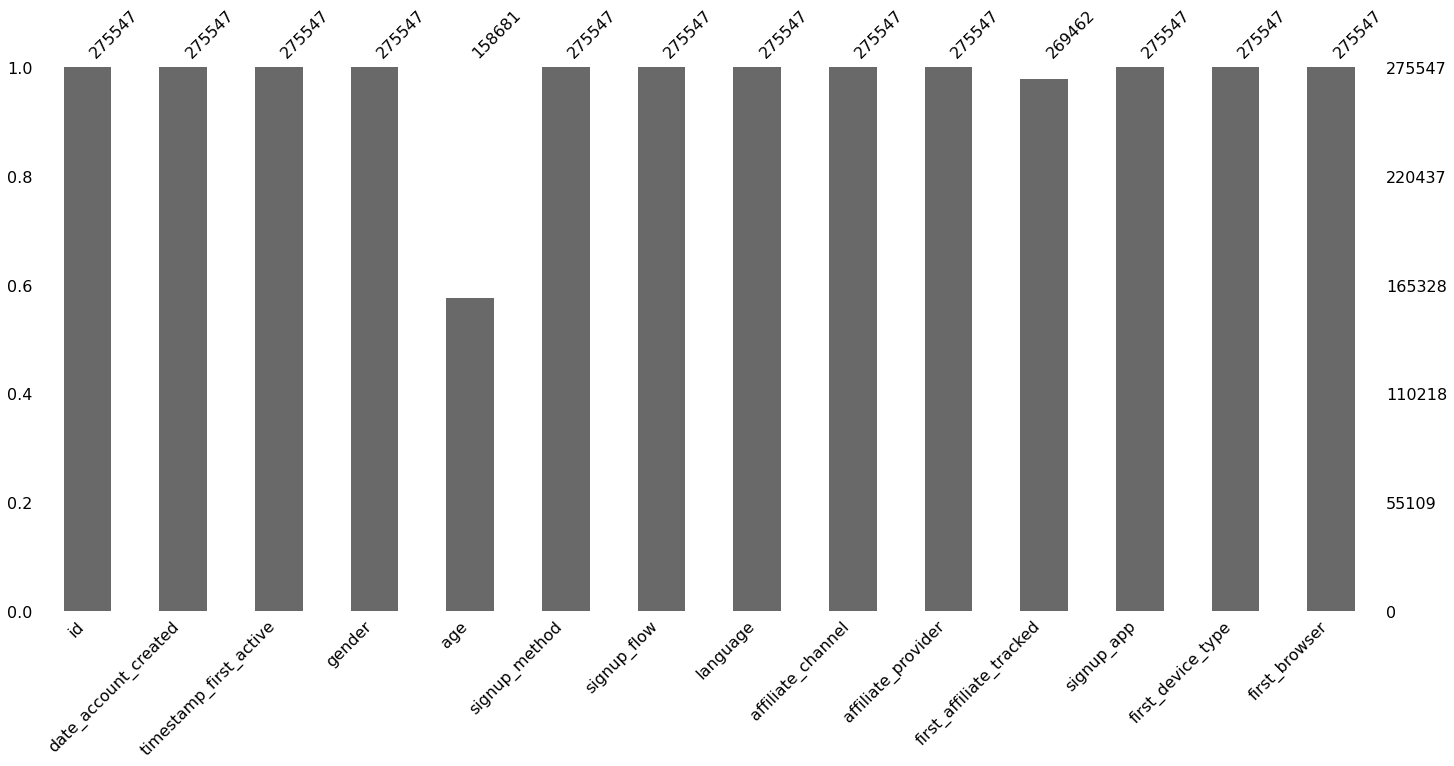

In [16]:
train_miss=msno.bar(df_all)

After combining two dataset, the age column misses 116866 values, amost 42.4% of all age values. 
As to age, we will need to see more about it before deciding how to impute missing value.

#### Preprocessing Data
1. replace the '-unknown-' as 'NaN' in gender and first_browser column.
2. filter age into a reasonable range, divide age into age groups and fillup others as 'NaN'
3. convert date_account_created(DAC) datatype and plot the trend of DAC by days


In [17]:
df_all.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
dtype: object

In [18]:
# Replace unknown with NAN  
df_all.gender.replace('-unknown-', np.nan, inplace=True)
df_all.first_browser.replace('-unknown-', np.nan, inplace=True)

#### Age

In [19]:
df_all.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

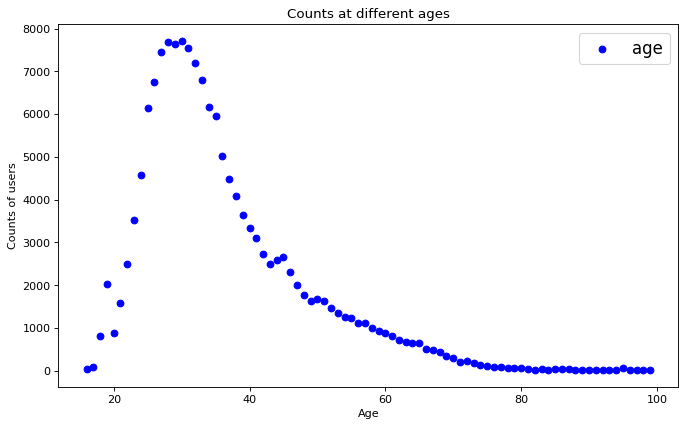

In [20]:
# correct age with right type
# if x is larger than 1900 and less than 2000 we assume that the users enter their birthday year as their age.
df_all['age'] = df_all['age'].apply(lambda x: int(2014 - x) if ( x > 1900) & (x<2000 ) else x)
# The age range from 1 to 2014, how ever the reasonable range should be around 16 to 100. 
# To select a reasonable age range, I will fillter age younger than 16, and any one older than 100 
df_age= df_all[(df_all['age']>15) & (df_all['age']<100)]

a1 =df_age.age.value_counts() # counts of people at different ages
# show a scatter plot to see age distribution
plt.figure(figsize=(10, 6), dpi=80)

plt.scatter(a1.index.values,a1.values,color='b',label = 'age')
plt.title("Counts at different ages")
plt.xlabel("Age")
plt.ylabel("Counts of users")
plt.legend(loc = 'upper right', fontsize = 15)

In [21]:
df_age.age.describe()

count    155963.000000
mean         36.062803
std          11.664332
min          16.000000
25%          28.000000
50%          33.000000
75%          42.000000
max          99.000000
Name: age, dtype: float64

The age distribution shows that users' ages is slightly right skewed as expected (lesser aged users).The majority of users are between the age of 20 to 45, and the averaged age is 36. 


In [22]:
# As the age is right skewed, I divid user ages into various group, and create age categorical features:
# And set age that outof range and missing values as 'NaN'
# The age_group will 
df_all['age_group']=df_all['age'].apply(lambda x: '16 - 20' if 15<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else '60-70' if 60<x<=70
                                                  else '70+' if 70<x<=100
                                                  else np.nan)

####  date_account_created

In [23]:
# convert int type into datetime type
df_all['date_account_created'] = pd.to_datetime(df_all['date_account_created'])

In [24]:
# find out the counts of account created in each day

df_dac = df_all['date_account_created'].value_counts()
print (df_dac .describe())

count    1726.000000
mean      159.644844
std       184.741206
min         1.000000
25%        16.250000
50%        94.000000
75%       235.000000
max      1105.000000
Name: date_account_created, dtype: float64


In [25]:
# find out the starting day and ending day, and time inverval of account created dates.
df_date= pd.to_datetime(df_dac.index)
first_date = df_date.min()
last_date = df_date.max()
interval =  last_date - first_date 
    
print (' first_date' , first_date)
print (' last_date' , last_date)
print ('interval'  , interval)

 first_date 2010-01-01 00:00:00
 last_date 2014-09-30 00:00:00
interval 1733 days 00:00:00


The averaged account created by day is 159. The least count of account created is 1 and the highest is 1105. 
We will find out when there are more accounts created.

#### How many accounts are created by days

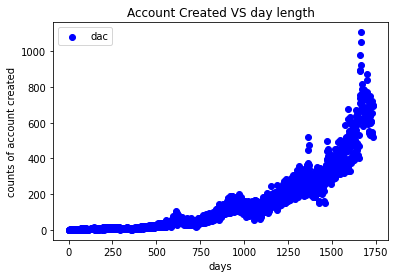

In [26]:
# find how many days between the first date in record and the account created date
dac_day = df_date-df_date.min()

plt.scatter(dac_day.days, df_dac.values, color = 'b',label='dac')

plt.title('Account Created VS day length')
plt.xlabel('days')
plt.ylabel('counts of account created')
plt.legend(loc='upper left')


In the beginning, there are only a few new accounts, but as Airbnb grows, more users register for new accounts. That is, the most recent dates has more new accounts created.

### Data Visualization
  
  Plot histograms to understand numberical data  and bar charts to understand categorical data
  
  The visualization will try to solve the following problem:
  1. How do new users increase each month and each year ?
  



#### How do new user accounts increase by month ?

In [27]:
# Split DAC into dac_year,dac_month,dac_day, preparing for further exploration

dac_sep =np.vstack(df_all['date_account_created'].astype(str).apply(lambda x: 
                                    list(map(int, x.split('-')))))
dac_df= pd.DataFrame(dac_sep, columns = ['dac_year','dac_mon','dac_day'])
# create dataframe by year
dac_2010 = dac_df[dac_df['dac_year']==2010]
dac_2011 = dac_df[dac_df['dac_year']==2011]
dac_2012 = dac_df[dac_df['dac_year']==2012]
dac_2013 = dac_df[dac_df['dac_year']==2013]
dac_2014 = dac_df[dac_df['dac_year']==2014]

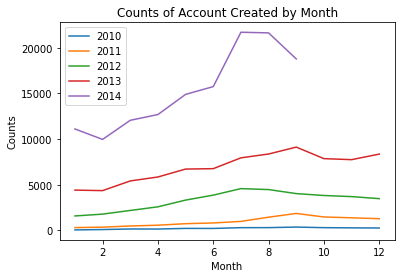

In [28]:
# Plot the New Account Created by month
dac_years = [dac_2010,dac_2011,dac_2012,dac_2013,dac_2014]
years = list(sorted(dac_df['dac_year'].unique()))

for i in range(0,len(dac_years)):
    y=dac_years[i].dac_mon.value_counts().sort_index()
    plt.plot(y.index.values,y.values,label = years[i])
    
plt.title('Counts of Account Created by Month')
plt.xlabel('Month')
plt.ylabel('Counts')
plt.legend(loc="upper left")



We can see that along each month, the account created amount varied. The amout droped in winter and peaked in summer. so it makes sense to consider the differnece in month.

#### Categorical Features
##### Gender, signup_method,affiliate_channel, and etc


In [29]:
# plot features
# feature is the column name, str
def feature_plot(feature, df, figsize=(12,6), rot = 90, saveimg = False):
    
    # count the number of all unique values of the column in the dataset
    feat_df = df[feature].value_counts()    
    fig_feature, axis1 = plt.subplots(1,sharex=True, sharey = True, figsize = figsize)
    # x is the unique values of the column, and y is the counts of unique values
    sns.barplot(feat_df.index.values, feat_df.values, ax = axis1)
    
    axis1.set_xticklabels(axis1.xaxis.get_majorticklabels(), rotation = rot)
    axis1.set_title(feature +'Counts')
    axis1.set_ylabel('Counts')
    
    
    if saveimg == True:
        figname = feature + ".png"
        fig_feature.savefig(figname, dpi = 75)

#### Plot for all the ct_features

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-package

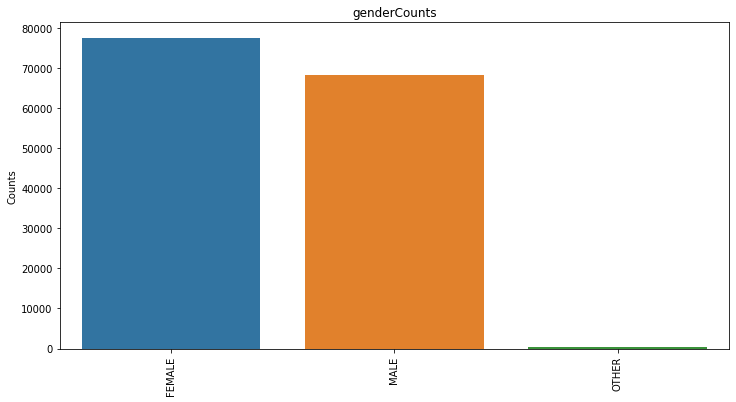

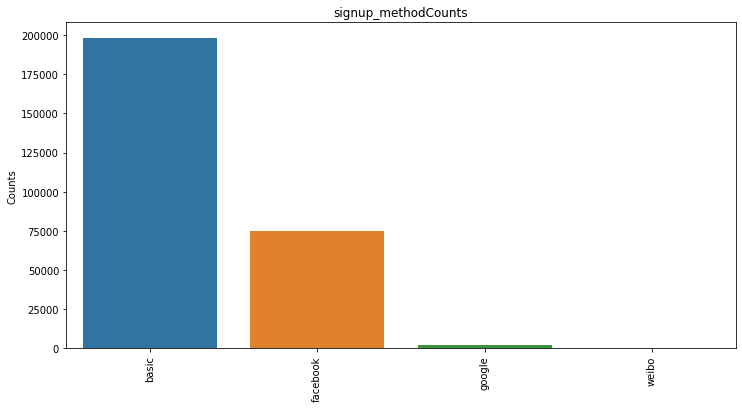

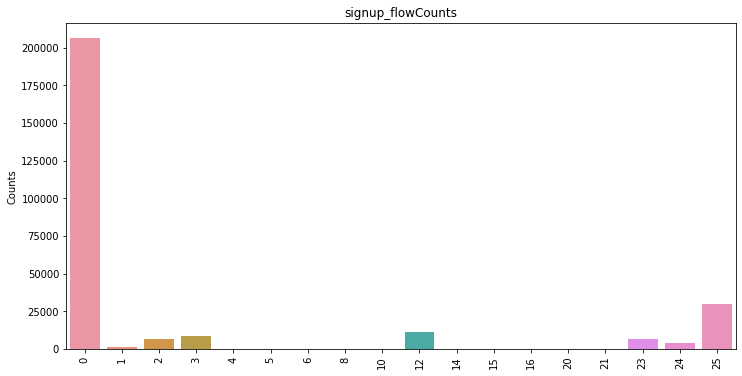

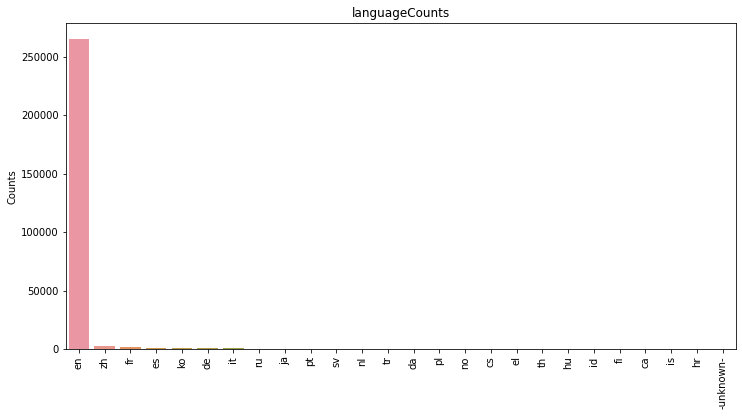

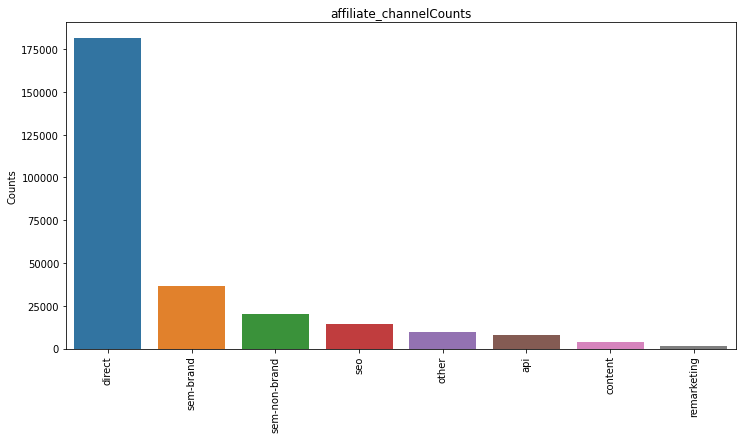

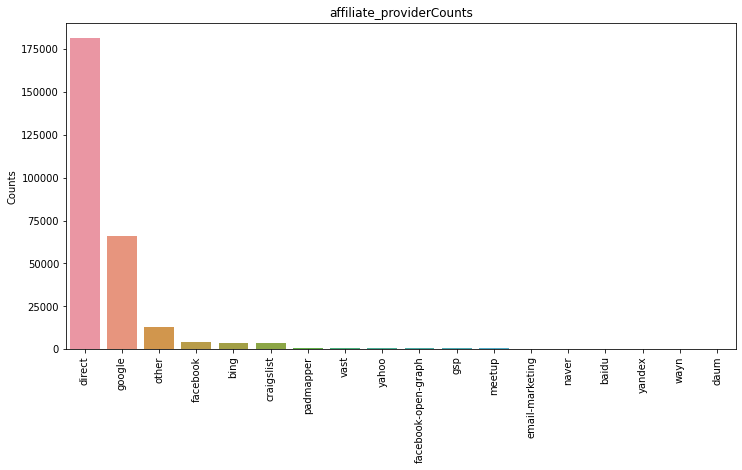

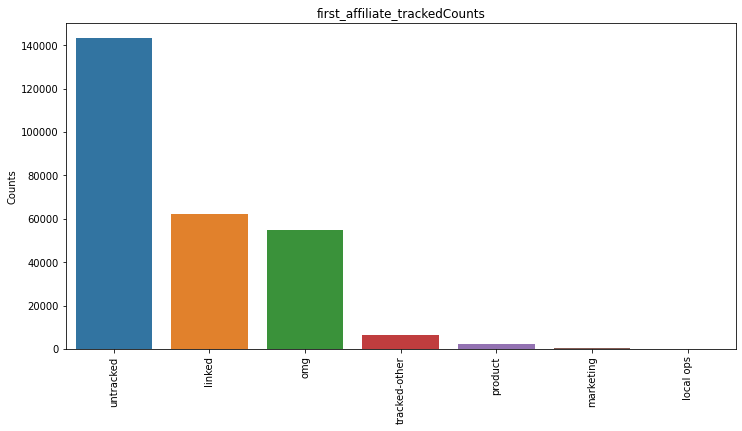

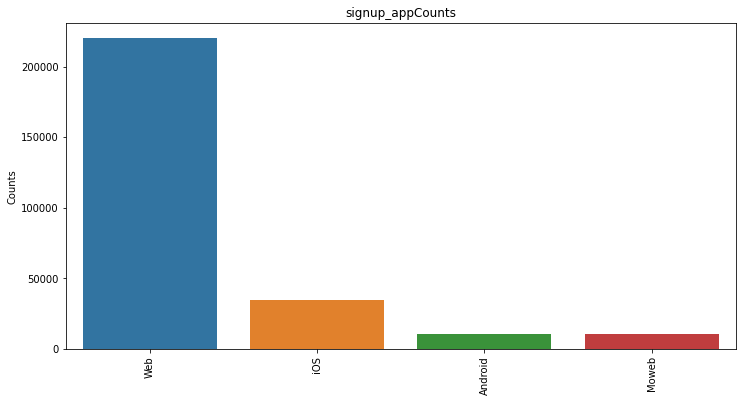

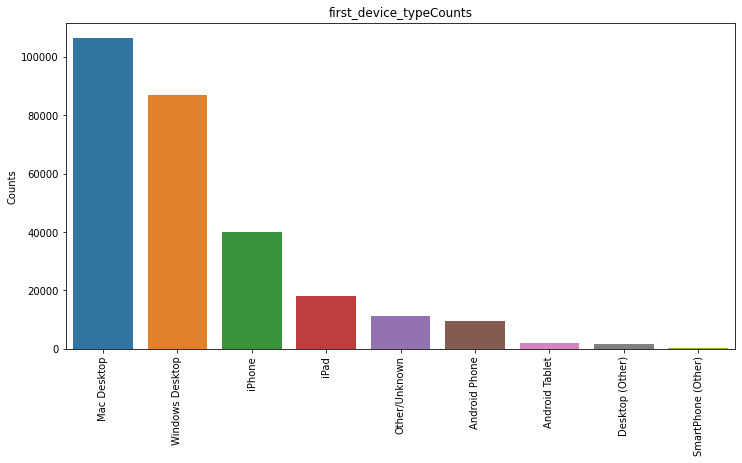

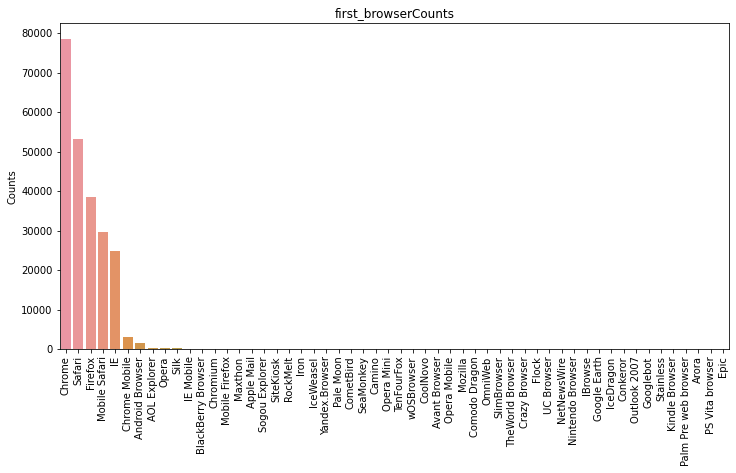

In [30]:
ct_features = ['gender',
              'signup_method',
              'signup_flow',
              'language',
              'affiliate_channel',
              'affiliate_provider',
              'first_affiliate_tracked',
              'signup_app',
              'first_device_type',
              'first_browser']

for feat in ct_features:
    feature_plot(feat,df_all)

### Further Explortion
#### How age and gender impact other features?


Text(0.5, 1.0, 'Gender-Age Distribution')

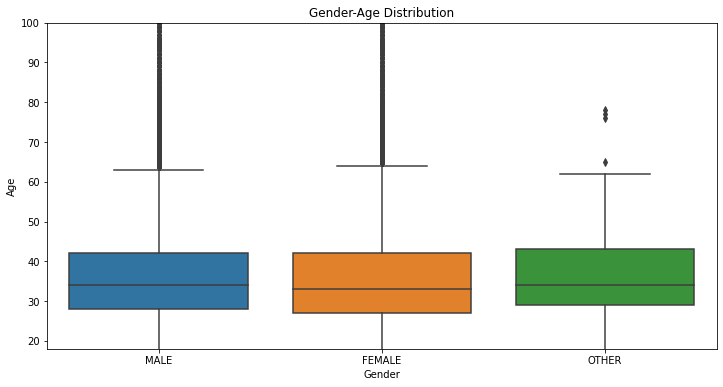

In [31]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=[12,6])
sns.boxplot(data=df_all,y='age',x='gender');
plt.ylim(18,100)
plt.xlabel('Gender');
plt.ylabel('Age');
plt.title('Gender-Age Distribution')

Generally, Male and female are have no big difference in age ranging from 25 to 40. But female users are slightly younger than male.

##### Signup Method by user in differnet age and gender

Text(0.5, 1.0, 'Signup Method by users in differnet age and gender')

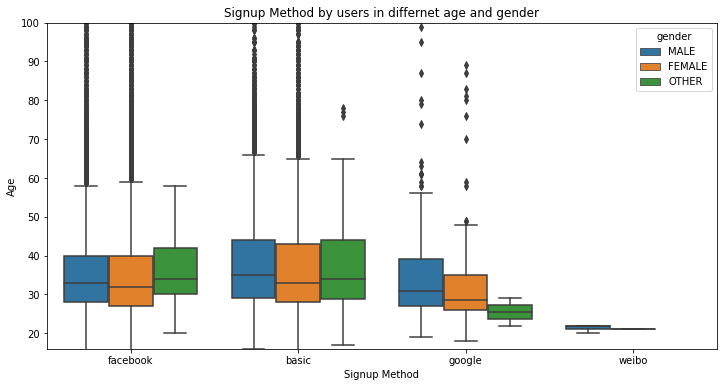

In [32]:

fig= plt.figure(figsize = (12,6))
sns.boxplot(data =df_all, y = 'age', x = 'signup_method',hue='gender')
plt.ylim(16,100)
plt.xlabel('Signup Method')
plt.ylabel('Age')
plt.title('Signup Method by users in differnet age and gender')

##### First device type by users in differnet age and gender

Text(0.5, 1.0, 'First device type by users in differnet age and gender')

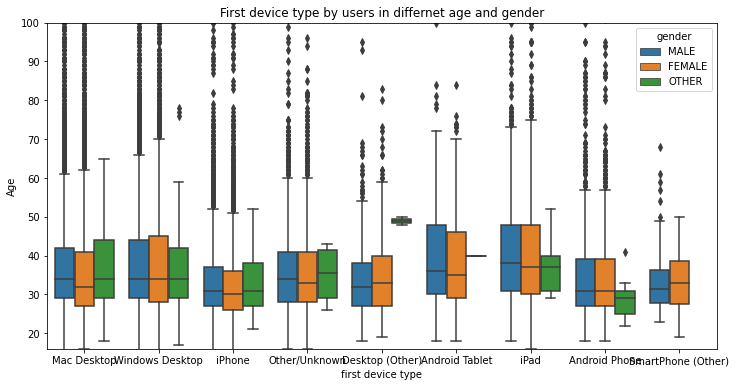

In [33]:
fig= plt.figure(figsize = (12, 6))
sns.boxplot(data =df_all, y = 'age', x = 'first_device_type',hue='gender')
plt.ylim(16,100)
plt.xlabel('first device type')
plt.ylabel('Age')
plt.title('First device type by users in differnet age and gender')

##### Top 10 Browser  and their preferences in different age and gender groups

In [34]:
# Selet Top 10 browsers and replace other browsers as 'Others'
topbrowser= list(df_all.first_browser.value_counts().sort_values(ascending=False)[10:].index)

df_all['first_browser']=df_all.first_browser.replace(to_replace=topbrowser,value='Others')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


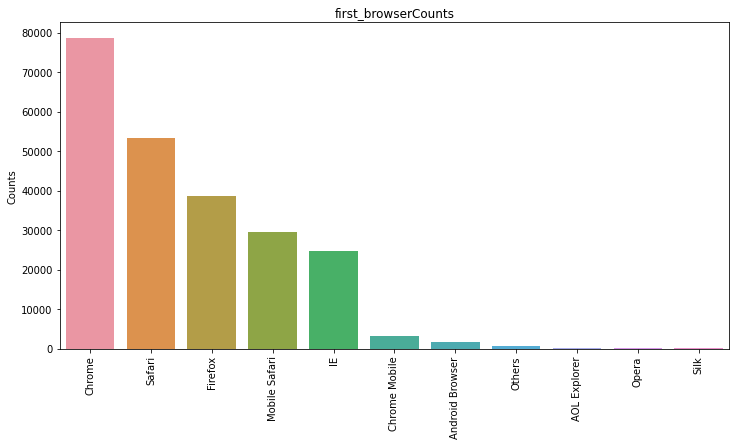

In [35]:
feature_plot('first_browser',df_all)

Text(0.5, 1.0, 'First browser by users in differnet age and gender')

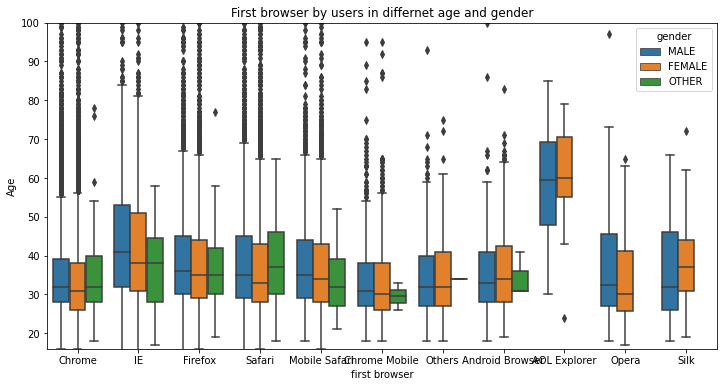

In [36]:
fig= plt.figure(figsize = (12,6))
sns.boxplot(data =df_all, y = 'age', x = 'first_browser',hue='gender')
plt.ylim(16,100)
plt.xlabel('first browser')
plt.ylabel('Age')
plt.title('First browser by users in differnet age and gender')

#### Distribution of Country_destination 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


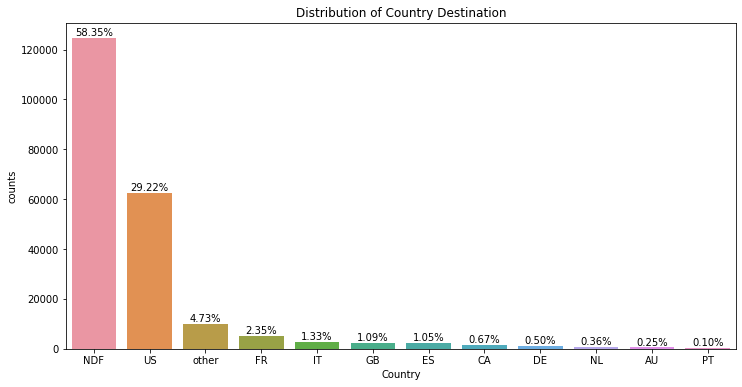

In [37]:
fig= plt.figure(figsize = (12,6))
train_cd = train.country_destination.value_counts()
sns.barplot(train_cd.index.values,train_cd.values)

plt.title('Distribution of Country Destination')
plt.ylabel('counts')
plt.xlabel('Country')
for i in range(train_cd.shape[0]):
    count= train_cd[i]
    strt='{:0.2f}%'.format(100*count/train.shape[0])
    plt.text(i,count+1000,strt,ha='center')

We find out that over 58% of users haven't make a booking yet. For users that have made the first booking, US is their favourite chose. We also notice that most of the users are using English as their Language. So it's reasonable to assume that a great amount of users are in the US. 

#### Who travels more and what's the mostly booked destination?

Text(0.5, 1.0, 'Gender-Destination Distribution')

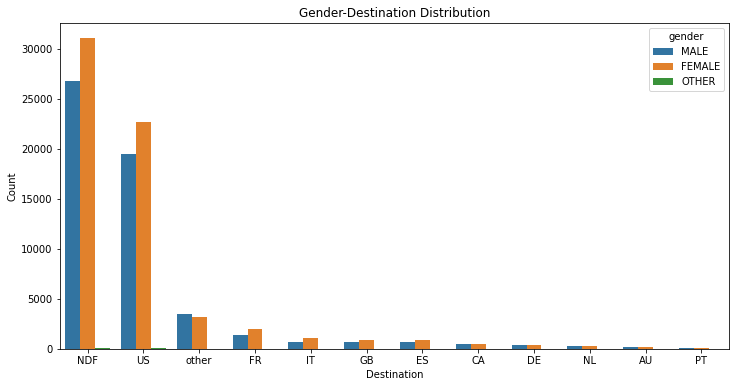

In [38]:
train.gender.replace('-unknown-', np.nan, inplace=True)

fig= plt.figure(figsize = (12, 6))

sns.countplot(data = train, x = 'country_destination', order = train_cd.index,hue='gender')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Gender-Destination Distribution')


Travelers' Top5 favortie booking destination is US, France, Italiy, Britan and Spain. 
Female travelers' shows more preference in US, France and Italiy.

#### What are the most popular countries in differnet ages?

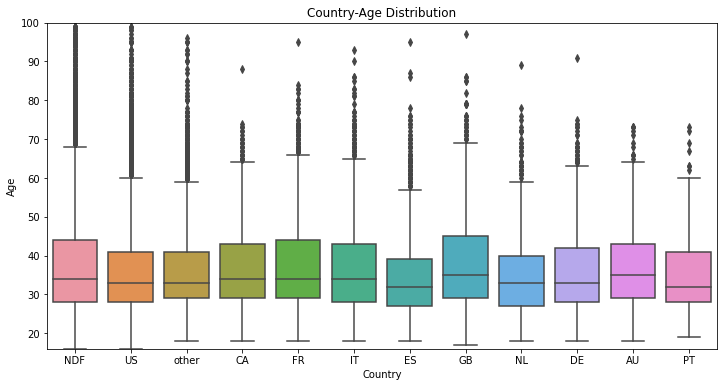

In [39]:
df_train =train.copy()
df_train['age'] = df_train['age'].apply(lambda x: int(2014 - x) if ( x > 1900) & (x<2000 ) else x)

df_train= df_train[(df_train['age']>15) & (df_train['age']<100)]
fig= plt.figure(figsize = (12,6))

sns.boxplot(data = df_train, y = 'age', x = 'country_destination')
plt.ylim(16,100)
plt.xlabel('Country');
plt.ylabel('Age');
plt.title('Country-Age Distribution');

Younger users prefer US. European countries like Britain, France,italy are also favored by older users

#### Which contry is more booked by users in different age and gender groups?

Text(0.5, 1.0, 'Country chosen by users in differnet age and gender')

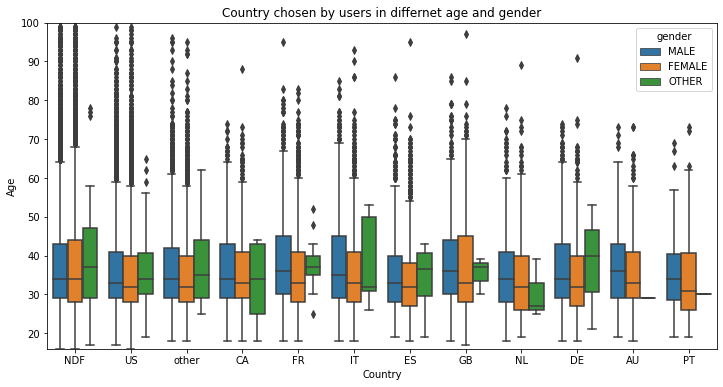

In [40]:
fig= plt.figure(figsize = (12,6))
sns.boxplot(data = df_train, y = 'age', x = 'country_destination',hue='gender')
plt.ylim(16,100)
plt.xlabel('Country')
plt.ylabel('Age')
plt.title('Country chosen by users in differnet age and gender')

We can find out that female users are younger than male users. Female who make the first booking has the averaged age in 32. Male users who make the first booking are over 35 on average. 
Female and male travelers have similar protion in booking US, France, Italiy, Spain. But more female choose UK, Purtuge as their first destination.

#### Which age group contribute to the most of booking in 2013 and 2014 ?

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Counts')

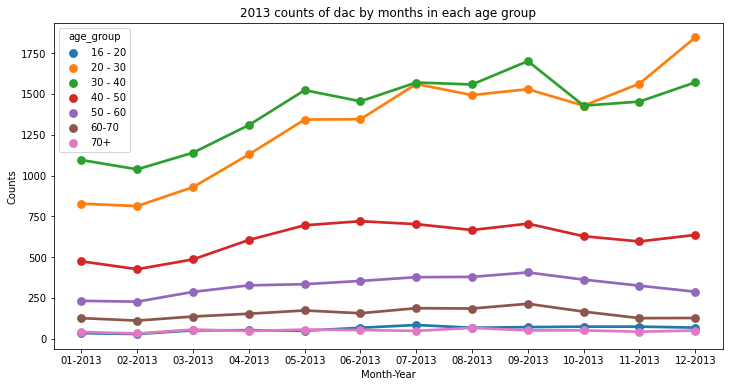

In [41]:
# Here we choose 2013 and 2014's data as the significant user growth occured in 2013
df_2013 = df_all[df_all['date_account_created'].dt.year==2013]
df_2013['monY13'] = df_2013['date_account_created'].map(lambda x: x.strftime('%m-%Y'))

df_2013= df_2013.groupby(['monY13','age_group']).count()

df_2013.reset_index(inplace=True)
plt.figure(figsize=[12,6])
sns.pointplot(data=df_2013,x='monY13',y='affiliate_channel',hue='age_group');
plt.title('2013 counts of dac by months in each age group');
plt.xlabel('Month-Year')
plt.ylabel('Counts')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Counts')

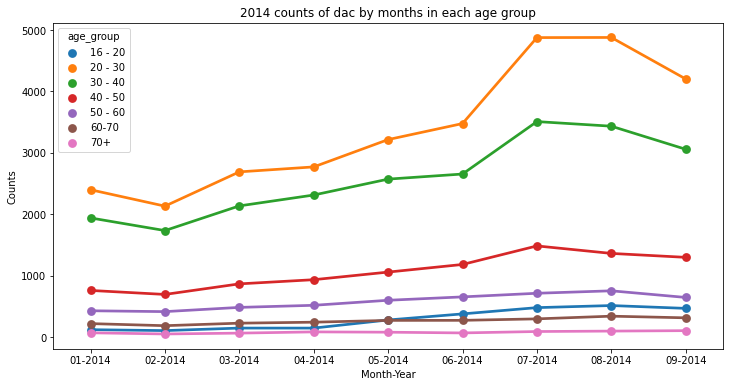

In [42]:
df_2014 = df_all[df_all['date_account_created'].dt.year==2014]
df_2014['monY14'] = df_2014['date_account_created'].map(lambda x: x.strftime('%m-%Y'))

df_2014= df_2014.groupby(['monY14','age_group']).count()

df_2014.reset_index(inplace=True)
plt.figure(figsize=[12,6])
sns.pointplot(data=df_2014,x='monY14',y='affiliate_channel',hue='age_group');
plt.title('2014 counts of dac by months in each age group');
plt.xlabel('Month-Year')
plt.ylabel('Counts')

In June 2014, we can see a significant growth in users aged from 16-30. It means that the age group from 16-30 contribute the most growth of new users in 2013 and 2014.

#### How's the gender distribution of booking in 2013 ?

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Counts')

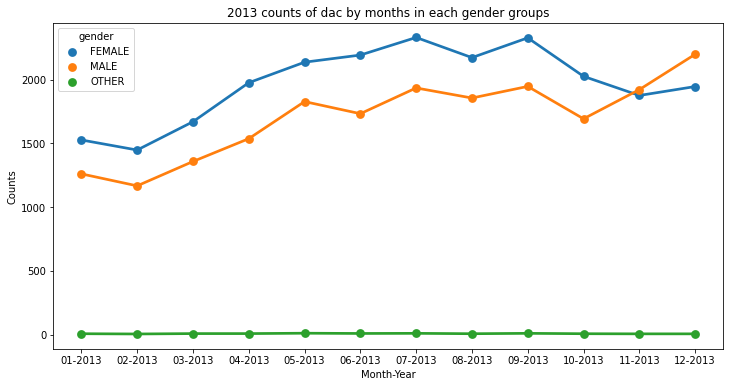

In [43]:
df13 = df_all[df_all['date_account_created'].dt.year==2013]
df13['monY13'] = df13['date_account_created'].map(lambda x: x.strftime('%m-%Y'))
df13= df13.groupby(['monY13','gender']).count()
df13.reset_index(inplace=True)
plt.figure(figsize=[12,6])

sns.pointplot(data=df13,x='monY13',y='affiliate_provider',hue='gender');
plt.title('2013 counts of dac by months in each gender groups');
plt.xlabel('Month-Year')
plt.ylabel('Counts')

 During the year, femal and male users grew in similar trend, but femal users almost made more bookings than male users did. Femals reduced their traveling plans in winter while males tended to travel more during the holiday.

## Feature Engineering
 1. Processing Sessions Data

 2. Preparing df_all Data

###  Processing Session Data
1. fillup missing values
2. create new features
3. log transformation to avoid right skewed

In [44]:
session = read('../input/airbnb-recruiting-new-user-bookings/sessions.csv.zip')


(10567737, 6)


In [45]:
session.head(3)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0


In [46]:
# Rename 'id'column
session['id'] = session['user_id']
session = session.drop(['user_id'],axis=1)

In [47]:
miss_data(session)

['action', 'action_type', 'action_detail', 'secs_elapsed', 'id']
[79626, 1126204, 1126204, 136031, 34496]
['0.8%', '10.7%', '10.7%', '1.3%', '0.3%']


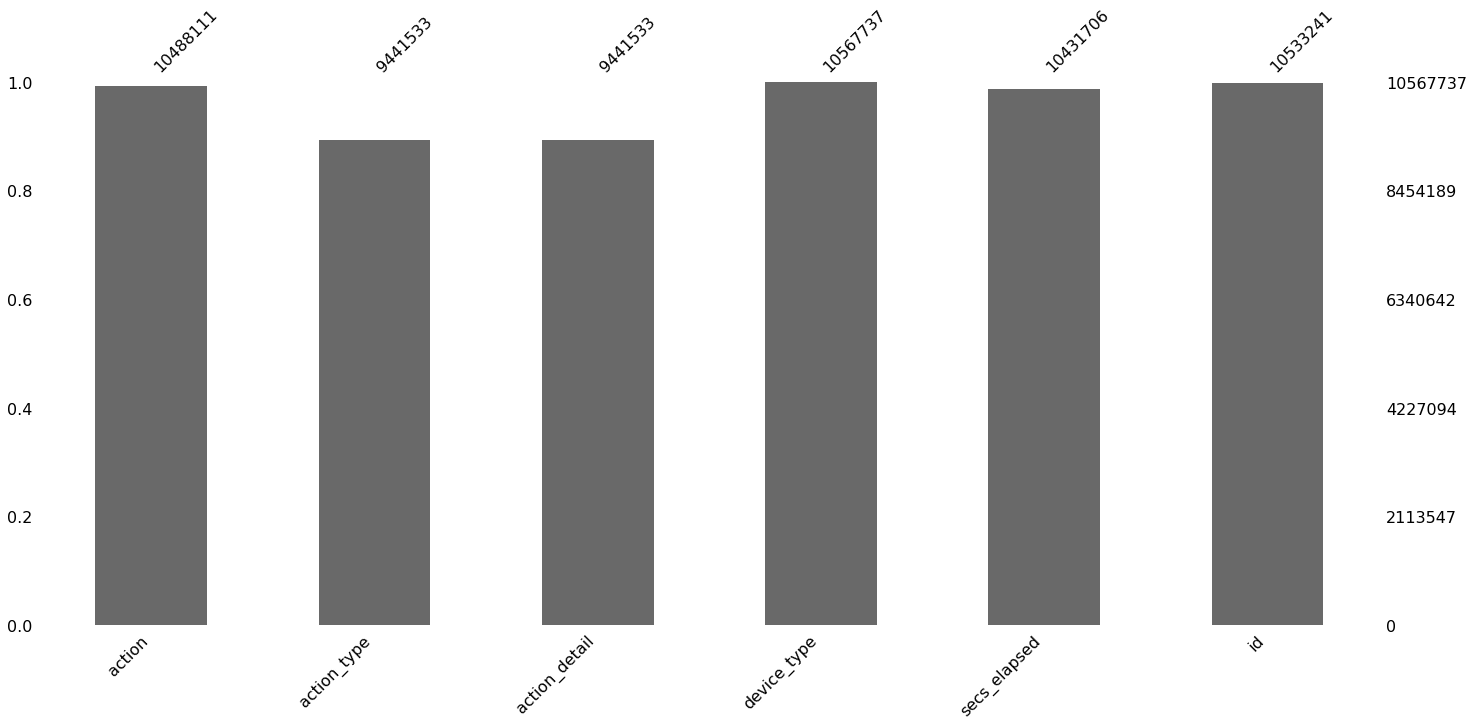

In [48]:
session_miss=msno.bar(session)

The action_type and action_detail columns missed over 10% data

#### Preparing Session data

In [49]:
# filling missing value with 'NAN'
def fill_nan(df,col,null_value = 'NAN'):
    '''
    df dataframe
    col column name, string
    '''
    df[col] = df[col].fillna(null_value)

In [50]:
for col in session.columns:
    fill_nan(session,col)

In [51]:
list_feat = session.columns[~session.columns.isin(['id'])]
list_feat

Index(['action', 'action_type', 'action_detail', 'device_type',
       'secs_elapsed'],
      dtype='object')

In [52]:
session=session.replace('-unknown-','NAN')

#### Create new features in session

In [53]:
# count each feature's unique values
def unique_ct (df,col):
    '''
    df: dataframe
    col: column name
    '''
    ct = df[col].nunique()
    print(col, ct)

In [54]:
sess_feat = session.columns[~session.columns.isin(['id','secs_elapsed'])]
for col in sess_feat:
    unique_ct(session,col)
        

action 360
action_type 10
action_detail 155
device_type 14


In [55]:
# As the actions and action details have a long list of features for each users, and each users have many actions. 
# Here I only want to see how's each user's numbers of actions
# Calculate each user's action counts
action_count = session.groupby('id')['action'].count().reset_index()

#Calculate each user by unique action_type, action_details, device
unq_action_ct = session.groupby('id')['action'].nunique().reset_index()
unq_action_type_ct = session.groupby('id')['action_type'].nunique().reset_index()
unq_action_detail_ct =session.groupby('id')['action_detail'].nunique().reset_index()
unq_device_ct = session.groupby('id')['device_type'].nunique().reset_index()


In [56]:
session['secs_elapsed'] =session['secs_elapsed'].map(lambda x: float(x))

# Calculate each user by summarizing sec_elapsed
sum_sec_elapsed = session.groupby('id')['secs_elapsed'].sum().reset_index()


array([<AxesSubplot:title={'center':'action'}>], dtype=object)

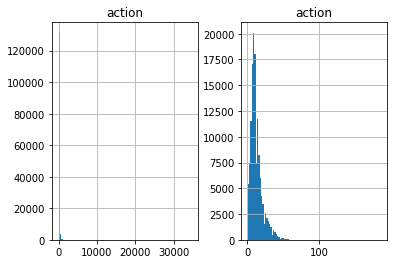

In [57]:
fig, axes = plt.subplots( 1, 2)

action_count.hist(bins=100,ax=axes[0])
unq_action_ct.hist(bins=100,ax=axes[1])


array([<AxesSubplot:title={'center':'action_detail'}>], dtype=object)

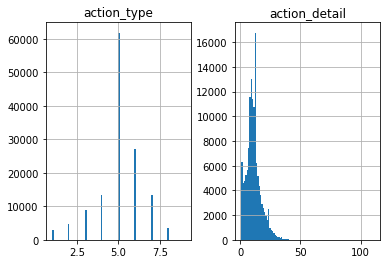

In [58]:
fig, axes = plt.subplots(1, 2)
unq_action_type_ct.hist(bins=100,ax=axes[0])
unq_action_detail_ct.hist(bins=100,ax=axes[1])


array([<AxesSubplot:title={'center':'secs_elapsed'}>], dtype=object)

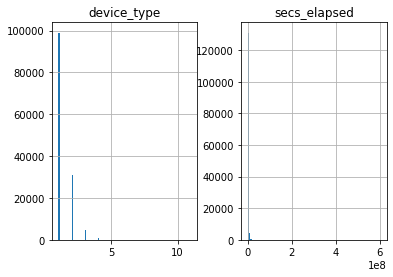

In [59]:
fig, axes = plt.subplots(1, 2)
unq_device_ct.hist(bins=100,ax=axes[0])
sum_sec_elapsed.hist(bins=100,ax=axes[1])

In [60]:
# Rename new columns after groupby
action_count.columns = ['id','action_ct']
unq_action_ct.columns = ['id','unq_action_ct']
unq_action_type_ct.columns = ['id','unq_action_type']
unq_action_detail_ct.columns = ['id','unq_action_detail']
unq_device_ct.columns = ['id','unq_device']
sum_sec_elapsed.columns = ['id','sum_sec_elapsed']

sum_sec_elapsed['sum_sec_elapsed'] =sum_sec_elapsed['sum_sec_elapsed'] .replace('NAN',np.nan)

Log Transformation

In [61]:
# To avoide the right skewed, we use log transformation to those new features.
log_action_count = action_count.action_ct.apply(lambda x: np.log(x + 1))
log_unq_action_ct= unq_action_ct.unq_action_ct.apply(lambda x: np.log(x + 1))
log_unq_action_type = unq_action_type_ct.unq_action_type.apply(lambda x: np.log(x + 1))
log_unq_action_detail = unq_action_detail_ct.unq_action_detail.apply(lambda x: np.log(x + 1))
log_unq_device_ct= unq_device_ct.unq_device.apply(lambda x: np.log(x + 1))
log_sum_sec_elapsed = sum_sec_elapsed.sum_sec_elapsed.apply(lambda x: np.log(x + 1))


In [62]:
#Use log transform to make the feature counts less skewed
# Add the a new column 
action_count['log_action_count']=log_action_count
unq_action_ct['log_unq_action_ct']= log_unq_action_ct
unq_action_type_ct['log_unq_action_type'] = log_unq_action_type
unq_action_detail_ct['log_unq_action_detail'] = log_unq_action_detail
unq_device_ct['log_unq_device']=log_unq_device_ct
sum_sec_elapsed['log_sum_sec_elapsed ']=log_unq_device_ct

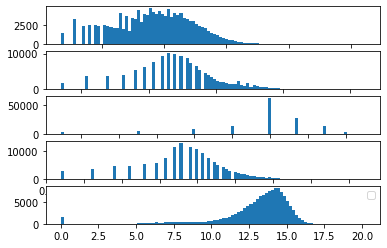

In [63]:
# remove all the NAN value for the plot
log_s = log_sum_sec_elapsed[~np.isnan(log_sum_sec_elapsed)]
#Plot the features' distribution after log transformation
plt.subplot(5,1,1)
plt.hist(log_action_count, bins=100)
plt.subplot(5,1,2)
plt.hist(log_unq_action_ct, bins=100)
plt.subplot(5,1,3)
plt.hist(log_unq_action_type, bins=100)
plt.subplot(5,1,4)
plt.hist(log_unq_action_detail, bins=100)
plt.subplot(5,1,5)
plt.hist(log_s, bins=100)
plt.legend()
plt.show()

After Log Transformation, we can see that the skewed data get closer to normal distribution

In [64]:
# Remove count features
action_count_1=action_count.drop(['action_ct'],axis=1)
unq_action_ct_1 = unq_action_ct.drop(['unq_action_ct'],axis=1)
unq_action_type_ct_1=unq_action_type_ct.drop( ['unq_action_type'],axis=1)
unq_action_detail_ct_1 = unq_action_detail_ct.drop(['unq_action_detail'],axis=1)
unq_device_ct_1 = unq_device_ct.drop(['unq_device'],axis=1)
sum_sec_elapsed_1= sum_sec_elapsed.drop(['sum_sec_elapsed'],axis=1)

### Preparing df_all data

features to deal with:
1. date_account_created: create year, month and day features
2. timestamp_first_active: create new features with date_account_created
3. age: use age_group for modeling
4. one hot encoding the other categorical features

In [65]:
# I predict that the year and month of date account created and timestamp_frist_active
# might influence the prediction results. So I created 'year','month'feature

# split dac to year, mon, day feature
df_all['dac_year']=dac_sep[:,0]
df_all['dac_mon']=dac_sep[:,1]
df_all['dac_day']=dac_sep[:,2]

# split tfa to year, mon, day feature

tfa_sep =np.vstack(df_all['timestamp_first_active'].astype(str).apply(lambda x: 
                           list(map(int,[x[:4], x[4:6], x[6:8]]))))

df_all['tfa_year']=tfa_sep[:,0]
df_all['tfa_mon']=tfa_sep[:,1]
df_all['tfa_day']=tfa_sep[:,2]

#### Time span between date_account_created and timestamp first active

In [66]:
# Convert tfa to datetime type
tfa = pd.to_datetime(df_all['timestamp_first_active'],format='%Y%m%d%H%M%S')
tfa = pd.to_datetime(tfa)

dac = df_all['date_account_created']
dt_span = dac.subtract(tfa).dt.days # calculate the time span between two dates

span_ct = dt_span.value_counts() # conts time span

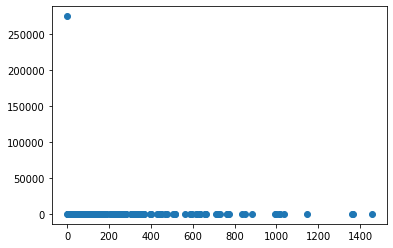

In [67]:
plt.scatter(span_ct.index.values, span_ct.values)

We see that most time span is within one day

In [68]:
# create categorical feature:
def get_span(dt):

    '''
    dt: int, the days between one account's created date and firstly activated date
    Set up timespan as a categorical feature:
    span == 0; 
    0 < span <= 31;
    31 < span < 365;
    span > 365
    '''
    if dt == 0:
        return 'OneDay'
    elif (dt <= 31) & (dt > 0):
        return 'OneMonth'
    elif (dt > 31) & (dt <= 365):
        return 'OneYear'
    else:
        return 'OverOneYear'

In [69]:
# encoding dt_span
df_all['dt_span'] = np.array([get_span(x) for x in dt_span])
df_dt_span = pd.get_dummies(df_all.dt_span, prefix='dt_span')
df_all = pd.concat([df_all, df_dt_span], axis=1)


In [70]:
df_all.head(2)

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,dac_mon,dac_day,tfa_year,tfa_mon,tfa_day,dt_span,dt_span_OneDay,dt_span_OneMonth,dt_span_OneYear,dt_span_OverOneYear
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,facebook,0,en,direct,direct,...,6,28,2009,3,19,OverOneYear,0,0,0,1
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,...,5,25,2009,5,23,OverOneYear,0,0,0,1


#### Age Engineering

In [71]:
age_group = df_all['age_group']

In [72]:
age_group.fillna(-1, inplace = True)

In [73]:
# encoding age group
df_age_group = pd.get_dummies(df_all.age_group, prefix = 'age')
df_all = pd.concat((df_all, df_age_group), axis = 1)


In [74]:

df =df_all.copy() # create a new dataframe to store all the values

df['first_affiliate_tracked'] = df['first_affiliate_tracked'].fillna('untracked')

# drop the columns that won't be used in prediction
df = df.drop(['date_account_created','timestamp_first_active','age','age_group','dt_span'], axis=1)

In [75]:
df_all.columns

Index(['id', 'date_account_created', 'timestamp_first_active', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'age_group', 'dac_year',
       'dac_mon', 'dac_day', 'tfa_year', 'tfa_mon', 'tfa_day', 'dt_span',
       'dt_span_OneDay', 'dt_span_OneMonth', 'dt_span_OneYear',
       'dt_span_OverOneYear', 'age_-1', 'age_16 - 20', 'age_20 - 30',
       'age_30 - 40', 'age_40 - 50', 'age_50 - 60', 'age_60-70', 'age_70+'],
      dtype='object')

#### One Hot Enconding categorical features

In [76]:
OHE_feature = ['gender',
    'signup_method',
    'signup_flow',
    'language',
    'affiliate_channel',
    'affiliate_provider',
    'first_affiliate_tracked',
    'signup_app',
    'first_device_type',
    'first_browser' ]

for feat in OHE_feature:
    df_feat = pd.get_dummies(df[feat], prefix=feat, dummy_na=True)
    df.drop([feat], axis = 1, inplace = True)
    df = pd.concat((df, df_feat), axis = 1)   

#### Merge with preprocessed session data

In [77]:
session_feat = [action_count_1,
                unq_action_ct_1,
                unq_action_type_ct_1,
               unq_action_detail_ct_1,
               unq_device_ct_1,
               sum_sec_elapsed_1]

for f in session_feat:
    df_tt = pd.merge(df, f, how='left')
    df_tt.drop(['id'],axis=1)

In [78]:
df_total=df_tt.drop('id',axis=1)

In [79]:
df_total.head()

,dac_year,dac_mon,dac_day,tfa_year,tfa_mon,tfa_day,dt_span_OneDay,dt_span_OneMonth,dt_span_OneYear,dt_span_OverOneYear,...,first_browser_Chrome Mobile,first_browser_Firefox,first_browser_IE,first_browser_Mobile Safari,first_browser_Opera,first_browser_Others,first_browser_Safari,first_browser_Silk,first_browser_nan,log_sum_sec_elapsed
0,2010,6,28,2009,3,19,0,0,0,1,...,0,0,0,0,0,0,0,0,0,NaN
1,2011,5,25,2009,5,23,0,0,0,1,...,0,0,0,0,0,0,0,0,0,NaN
2,2010,9,28,2009,6,9,0,0,0,1,...,0,0,1,0,0,0,0,0,0,NaN
3,2011,12,5,2009,10,31,0,0,0,1,...,0,1,0,0,0,0,0,0,0,NaN
4,2010,9,14,2009,12,8,0,0,1,0,...,0,0,0,0,0,0,0,0,0,NaN


## Modeling and Evaluation

In [80]:
import xgboost as xgb
from xgboost import plot_importance

In [81]:
from sklearn.metrics import make_scorer
# https://www.kaggle.com/davidgasquez/ndcg-scorer
# Evaluating ranking quality of the Xgboost recommendation engine
#  Discounted Cumulative Gain
def dcg_score(y_true, y_score, k=5):
    ''' This function calulate the Discounted cumulative gain (DCG) at rank K.

    Parameters
   
    y_true : array, shape = [n_samples]
        Ground truth ( true scores of entities to be ranked).
    y_score : array, shape = [n_samples, n_labels]
        Predicted scores 
    k : int, Rank.(Only consider the highest k score in the ranking.If None, use all outputs.)

    Returns
    score : float
    '''
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])
    gain = 2**y_true - 1
    discounts = np.log2(np.arange(len(y_true)) + 2)
    score = np.sum(gain/discounts)
    return score


def ndcg_score(ground_truth, predictions, k=5):
    '''Normalized discounted cumulative gain (NDCG) at rank K.

    The number of recommendation varys for every user and the 
    dcg score varys accordingly. Normalized DCG take a mean across all 
    all scores to report a final score.NDCG is the ratio of recommended order
    to DCG of ideal order. The ratio is always in the range[0,1]
        
    Parameters
    
    ground_truth : array, shape = [n_samples]
            true labels represended as integers
    predictions : array, shape = [n_samples, n_labels]
        Predicted probabilities.
    k : int, rank
    
    Returns:
    
    score : float
    '''
    lb = LabelBinarizer()
    lb.fit(range(len(predictions) + 1))
    T = lb.transform(ground_truth)
    scores = []
    #ground_truth = [1, 0, 2]  =>>>> 
    #ground_truth : [[0, 1, 0],       [1, 0, 0],    [0, 0, 1]]
    #predictions: [[0.15, 0.55, 0.2], [0.7, 0.2, 0.1], [0.06, 0.04, 0.9]]
    #zip =>>> take one vector from each batch
    # Iterate over each y_true and compute the DCG score
    for y_true, y_score in zip(T, predictions):
        actual = dcg_score(y_true, y_score, k)
        best = dcg_score(y_true, y_true, k)
        score = float(actual) / float(best)
        scores.append(score)

    return np.mean(scores)
# NDCG Scorer function
ndcg_scorer = make_scorer(ndcg_score, needs_proba=True, k=5)

In [82]:
def customized_eval(preds, dtrain):
    labels = dtrain.get_label()
    top = []
    for i in range(preds.shape[0]):
        top.append(np.argsort(preds[i])[::-1][:5])
    mat = np.reshape(np.repeat(labels,np.shape(top)[1]) == np.array(top).ravel(),np.array(top).shape).astype(int)
    score = np.mean(np.sum(mat/np.log2(np.arange(2, mat.shape[1] + 2)),axis = 1))
    return 'ndcg5', score

In [83]:
# Spliting Train and test dataset for modeling
train_row = train.shape[0]
# Split train and test
Xtrain =df_total.iloc[:train_row,:]
Xtest = df_total.iloc[train_row:,:]

X_train =Xtrain.values
X_test = Xtest.values

# convert the predictive variable to numerical values
le = LabelEncoder()
le.fit(contry_destination)
Y_train = le.transform(contry_destination)#Transforming the target variable using labels

In [84]:
# xgboost parameters

NUM_XGB = 100
RANDOM_STATE =42
params = {}
params['colsample_bytree'] = 0.6  # Subsample ratio of columns for each split
params['max_depth'] = 6 # Maximum tree depth for base learners
params['n_estimators']=43    
params['subsample'] = 0.8 # Subsample ratio of the training instance.
params['eta'] = 0.3 # learning rate
params['seed'] = RANDOM_STATE
params['num_class'] = 12
params['objective'] = 'multi:softprob'   # output the probability instead of class. 
params['eval_metric'] = 'merror'

train_score_iter = []
cv_score_iter = []
# kf = KFold(n_splits = 5, shuffle=True,random_state=RANDOM_STATE)
kf = KFold(n_splits = 5, shuffle=True,random_state=RANDOM_STATE)
k_ndcg = 5
key = 'XGboost'
feat_name =list(Xtrain.columns.values)
for train_index, test_index in kf.split(X_train, Y_train):

    xtrain, xtest = X_train[train_index, :], X_train[test_index, :]
    ytrain, ytest = Y_train[train_index], Y_train[test_index]
    print (xtrain.shape, xtest.shape)
    train_xgb = xgb.DMatrix(xtrain, label= ytrain,feature_names = feat_name)
    test_xgb = xgb.DMatrix(xtest, label = ytest,feature_names = feat_name)

    watchlist = [ (train_xgb,'train'), (test_xgb, 'test') ]

    bst = xgb.train(params, 
                     train_xgb,
                     NUM_XGB,
                     watchlist,
                     feval = customized_eval,
                     verbose_eval = 5)
    y_pred = np.array(bst.predict(test_xgb))
    y_pred_train = np.array(bst.predict(train_xgb))
    
    
    #  ndcg evaluation. 

    train_ndcg_score = ndcg_score(ytrain, y_pred_train , k = k_ndcg)
    cv_ndcg_score = ndcg_score(ytest, y_pred, k=k_ndcg)

    train_score_iter.append(train_ndcg_score)
    cv_score_iter.append(cv_ndcg_score)

train_score_xgb = np.mean(train_score_iter)
cv_score_xgb = np.mean(cv_score_iter)

print ("\nThe training score is: {}".format(train_score_xgb))
print ("The cv score is: {}\n".format(cv_score_xgb))

(170760, 137) (42691, 137)
[00:21:48] WARNING: ../src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-merror:0.38428	train-ndcg5:0.81869	test-merror:0.38596	test-ndcg5:0.81715
[5]	train-merror:0.36986	train-ndcg5:0.82565	test-merror:0.37132	test-ndcg5:0.82291
[10]	train-merror:0.36394	train-ndcg5:0.82827	test-merror:0.36595	test-ndcg5:0.82499
[15]	train-merror:0.36246	train-ndcg5:0.82923	test-merror:0.36551	test-ndcg5:0.82534
[20]	train-merror:0.36155	train-ndcg5:0.82992	test-merror:0.36453	test-ndcg5:0.82574
[25]	train-merror:0.36017	train-ndcg5:0.83089	test-merror:0.36427	test-ndcg5:0.82590
[30]	train-merror:0.35966	train-ndcg5:0.83153	test-merror:0.36343	test-ndcg5:0.82600
[35]	train-merror:0.35847	train-ndcg5:0.83249	

In [85]:
prediction = np.array(bst.predict(xgb.DMatrix(X_test,feature_names = feat_name)))

In [86]:
from xgboost import plot_importance

In [87]:
import xgboost as xgb

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

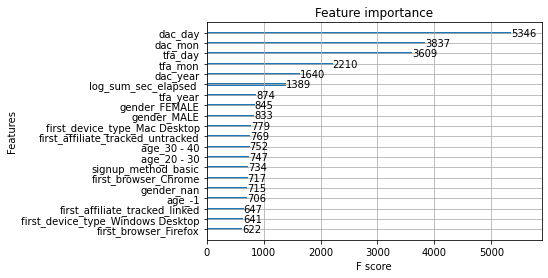

In [88]:
xgb.plot_importance(bst,max_num_features=20)



##### Evaluation

In [89]:
#Taking the 5 classes with highest probabilities
ids = []  #list of ids
countries = []  #list of countries
for i in range(len(id_test)-1):
    idx = id_test[i]
    ids += [idx] * 5
    countries += le.inverse_transform(np.argsort(prediction[i])[::-1])[:5].tolist()

In [90]:
sub = pd.DataFrame({"id" : ids,"country" : countries})


In [91]:
sub.to_csv('submission.csv',index=False)
